In [5]:
import numpy as np
import matplotlib.pyplot as plt

from cmax.config import config
from cmax.ebiv import EBIV

In [6]:
def test_data2():
    # 读取数据
    data = np.load("./data/slice1_ebiv_wallflow4_dense_3.npz")
    x,y,t,p = data["x"], data["y"], data["t"],data["p"]
    x,y,t,p = np.array(x),np.array(y),np.array(t),np.array(p)
    events = np.stack((x,y,t,p),axis=1)
    return events

events = test_data2()
events[:,2] = events[:,2]/1000.0 # 注意这个Trick
print(len(events))

75650


In [3]:
# Using the default config as in config.py
cfg = config()
cfg.grid_sz=[512,512] # or, you can specify it 
# cfg.estimator="EstimatorPCM"

ebiv = EBIV(cfg)
vecs = ebiv.compute(events)

print(cfg)

{'name': 'CMax config', 'grid_sz': [512, 512], 'win_sz': [40, 40], 'win_step': [16, 16], 'time_interval': [None, None], 'estimator': 'EstimatorCMax', 'IWE_sz': [32, 32], 'sigma2': 0.25, 'MaxIter': 48, 'lr': 0.1, 'debug': False}


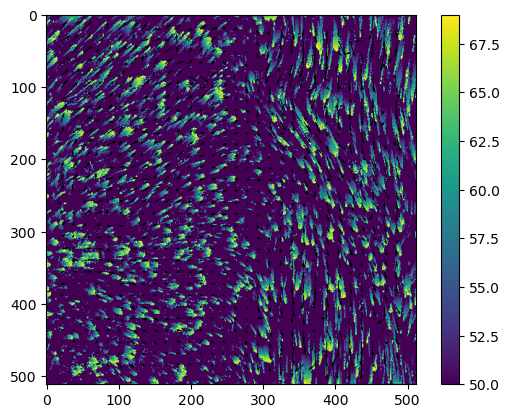

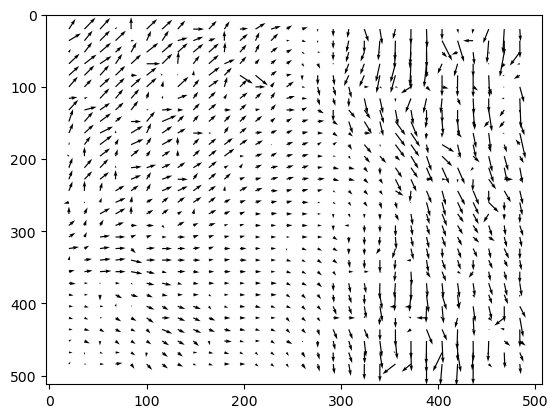

In [4]:
def visual_events(events):
    x_min, y_min = np.min(events[:,0]), np.min(events[:,1])
    x_max, y_max = np.max(events[:,0]), np.max(events[:,1])
    t_min = np.min(events[:,2])
    img = np.zeros((x_max-x_min+1,y_max-y_min+1)) + t_min
    img[(events[:,0]-x_min).astype(int),(events[:,1]-y_min).astype(int)] = events[:,2]
    plt.figure()
    plt.imshow(img)
    plt.colorbar()

visual_events(events)
plt.quiver(vecs[:,1],vecs[:,0],vecs[:,3],-vecs[:,2])
plt.figure()
plt.quiver(vecs[:,1],vecs[:,0],vecs[:,3],-vecs[:,2])
plt.ylim(512,0)
plt.show()